In [2]:
# Imports
import networkx as nx
import numpy as np
import matplotlib.pylab as plt


769
6440
5180


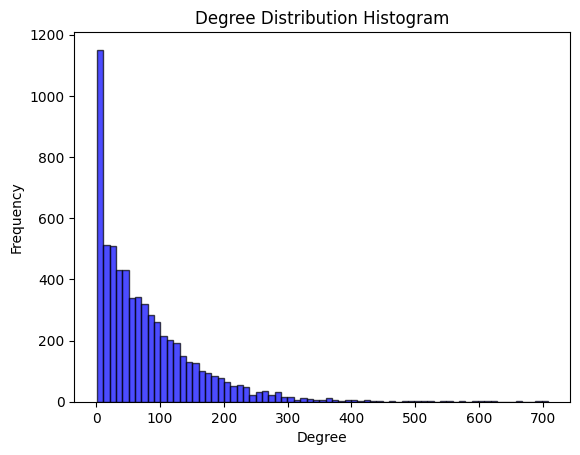

In [3]:
# Question 2.a
# Plotting the degree distribution of 3 networks : Caltech, MIT and Johns Hopkins

GCaltech = nx.read_gml("../data/Caltech36.gml")
GMIT = nx.read_gml("../data/MIT8.gml")

GHopkins = nx.read_gml("../data/Johns Hopkins55.gml")

""" print(len(GCaltech.nodes()))
print(len(GMIT.nodes()))
print(len(GHopkins.nodes()))
 """

def plotDegreeDistribution(G):
    """ degree = [v for k,v in dict(G.degree()).items()]
    distribution = [(elem, degree.count(elem)) for elem in sorted(set(degree))]
    k,pk = zip(*distribution)
    PDF = np.array(pk)/sum(pk)
    CCDF = 1-np.cumsum(PDF) 

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16/2,9/2))
    ax1.loglog(k, PDF, 'ro')
    ax1.set_xlabel("$k$ Degree")
    ax1.set_ylabel("$P_k$")
    ax1.set_title("PDF")

    ax2.loglog(k, CCDF, 'ro')
    ax2.set_ylim(1e-4,1.1)
    ax2.set_xlim(1,2e3)
    ax2.set_xlabel("$k$ Degree")
    ax2.set_ylabel("$1-P[K > k]$")
    ax2.set_title("CCDF")
    fig.tight_layout() """
    degrees = dict(G.degree())
    degree_values = list(degrees.values())

    # Plot the histogram
    plt.hist(degree_values, bins='auto', alpha=0.7, color='b', edgecolor='black')
    plt.title("Degree Distribution Histogram")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.show()

plotDegreeDistribution(GMIT)


In [5]:
# Question 2.b
# Compute global clustering coefficient and mean local clustering coefficient
# Compute the edge density

clusteringCoeffCaltech = nx.average_clustering(GCaltech)
clusteringCoeffMIT = nx.average_clustering(GMIT)
clusteringCoeffHopkins = nx.average_clustering(GHopkins)

print("clustering coef Caltech : ", clusteringCoeffCaltech)
print("clustering coef MIT : ",     clusteringCoeffMIT)
print("clustering coef Hopkins : ", clusteringCoeffHopkins)

densityCaltech = nx.density(GCaltech)
densityMIT = nx.density(GMIT)
densityHopkins = nx.density(GHopkins)

print("Density Caltech : ", densityCaltech)
print("Density MIT : ",     densityMIT)
print("Density Hopkins : ", densityHopkins)


# Density very low -> one person taken randomly in this graph has very low probability of knowing a lot of people
# Clustering coef relatively low -> in majority, people don't form perfect cluster (The people I know usually don't know all the people I know. This coef is between 0.2 and 0.4 which is not terrible after all : represents well real life friends group)


clustering coef Caltech :  0.40929439048517247
clustering coef MIT :  0.2712187419501315
clustering coef Hopkins :  0.26839307371293525
Density Caltech :  0.05640442132639792
Density MIT :  0.012118119495041378
Density Hopkins :  0.013910200162372396


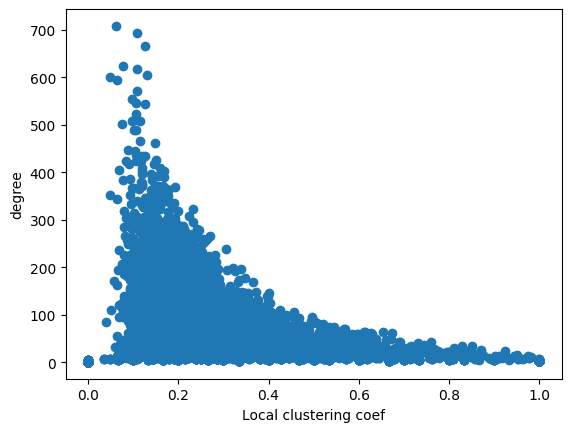

In [13]:
# Question 2.c
# Plot the scatter plot of the degree in regards to the local clustering coef


def plotDegreeLocalClustering(G):
    clustering = nx.clustering(G)
    clusteringCoefs = list(clustering.values())
    
    degrees = dict(G.degree())
    degree_values = list(degrees.values())

    plt.scatter(clusteringCoefs, degree_values, marker = "o")
    plt.ylabel("degree")
    plt.xlabel("Local clustering coef")

#plotDegreeLocalClustering(GCaltech)
plotDegreeLocalClustering(GMIT)
#plotDegreeLocalClustering(GHopkins)

# The more the degree increases the higher the more likely the person is to not be part of a local cluster. Thoses ppl can be faculty members, professors, staff, board members etc. They know a lot of ppl (high degree) but ofc all the ppl they know usually don't know each other
# Only ppl with a low degree can achieve a local high local cluster coefficient : in universities, ther are for example small group of friends that are very bounded and do not know a lot of other ppl.
# At a low degree, ppl can have any local clustering coeff : some ppl don't have a close group of friends and still don't know a lot of people. 


In [ ]:
# Question 3.a